In [1]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import pandas as pd
import numpy as np
from xgboost import XGBRegressor
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import make_scorer, mean_squared_error

df = pd.read_csv("dataset.csv")
y = df["popularity"]

features = [
    "duration_ms", "danceability", "energy", "key", "loudness", "mode",
    "speechiness", "acousticness", "instrumentalness", "liveness",
    "valence", "tempo", "time_signature", "explicit"
]


X = df[features]

print(X.head())

   duration_ms  danceability  energy  key  loudness  mode  speechiness  \
0       230666         0.676  0.4610    1    -6.746     0       0.1430   
1       149610         0.420  0.1660    1   -17.235     1       0.0763   
2       210826         0.438  0.3590    0    -9.734     1       0.0557   
3       201933         0.266  0.0596    0   -18.515     1       0.0363   
4       198853         0.618  0.4430    2    -9.681     1       0.0526   

   acousticness  instrumentalness  liveness  valence    tempo  time_signature  \
0        0.0322          0.000001    0.3580    0.715   87.917               4   
1        0.9240          0.000006    0.1010    0.267   77.489               4   
2        0.2100          0.000000    0.1170    0.120   76.332               4   
3        0.9050          0.000071    0.1320    0.143  181.740               3   
4        0.4690          0.000000    0.0829    0.167  119.949               4   

   explicit  
0     False  
1     False  
2     False  
3     False 

In [2]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
reg = XGBRegressor(random_state=42)
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.7, 0.8, 1.0],
    'colsample_bytree': [0.7, 0.8, 1.0],
    'gamma': [0, 1, 5]
}
rmse_scorer = make_scorer(mean_squared_error, greater_is_better=False, squared=False)
grid_search = GridSearchCV(
    estimator=reg,
    param_grid=param_grid,
    scoring=rmse_scorer,
    cv=3,
    n_jobs=-1,
    verbose=2
)

grid_search.fit(X_train, y_train)

Fitting 3 folds for each of 729 candidates, totalling 2187 fits


C:\Users\ludov\AppData\Roaming\Python\Python313\site-packages\sklearn\model_selection\_search.py:1135: UserWarning: One or more of the test scores are non-finite: [nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan n

,estimator,"XGBRegressor(...ree=None, ...)"
,param_grid,"{'colsample_bytree': [0.7, 0.8, ...], 'gamma': [0, 1, ...], 'learning_rate': [0.01, 0.1, ...], 'max_depth': [3, 5, ...], ...}"
,scoring,make_scorer(m...squared=False)
,n_jobs,-1
,refit,True
,cv,3
,verbose,2
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,objective,'reg:squarederror'


In [ ]:
print("Meilleurs paramètres:", grid_search.best_params_)
print("Meilleur score (RMSE) validation:", -grid_search.best_score_)

best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("\n=== RÉSULTATS SUR L'ENSEMBLE DE TEST ===")
print(f"MAE (Mean Absolute Error): {mae:.4f}")
print(f"MSE (Mean Squared Error): {mse:.4f}")
print(f"RMSE (Root Mean Squared Error): {rmse:.4f}")
print(f"R² Score: {r2:.4f}")

Meilleurs paramètres: {'colsample_bytree': 0.7, 'gamma': 0, 'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 50, 'subsample': 0.7}
Meilleur score (RMSE) validation: nan

=== RÉSULTATS SUR L'ENSEMBLE DE TEST ===
MAE (Mean Absolute Error): 18.5743
MSE (Mean Squared Error): 484.0766
RMSE (Root Mean Squared Error): 22.0017
R² Score: 0.0191


In [3]:
preds = reg.predict(X_test)
mae = mean_absolute_error(y_test, preds)
rmse = np.sqrt(mean_squared_error(y_test, preds))
r2 = r2_score(y_test, preds)

print(f"Mean Absolute Error: {mae:.3f}")
print(f"Root Mean Squared Error: {rmse:.3f}")
print(f"R^2 Score: {r2:.3f}")

NotFittedError: need to call fit or load_model beforehand

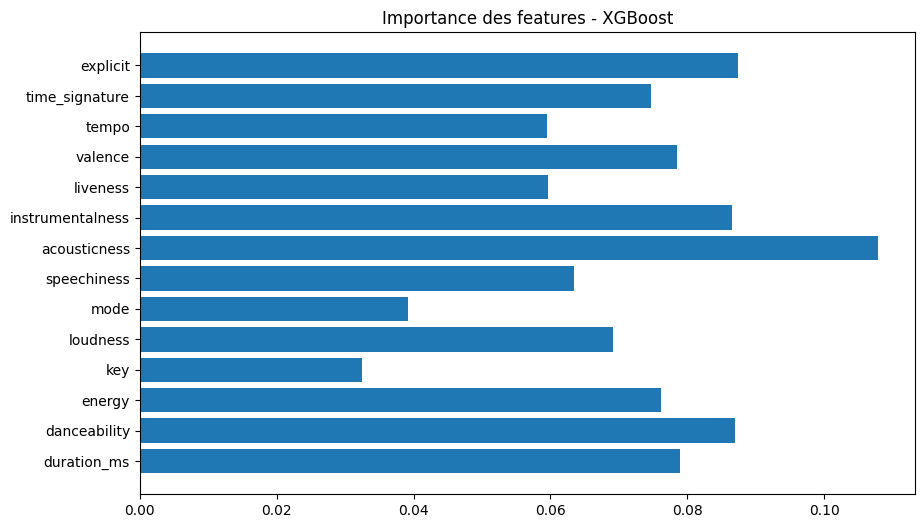

In [ ]:
importances = reg.feature_importances_
plt.figure(figsize=(10,6))
plt.barh(X.columns, importances)
plt.title("Importance des features - XGBoost")
plt.show()

In [ ]:
from sklearn.model_selection import KFold, cross_val_score

reg = DecisionTreeRegressor(max_depth=5, random_state=42)
kf = KFold(n_splits=5, shuffle=True, random_state=42)

scores = cross_val_score(
    reg,
    X_train,
    y_train,
    scoring="neg_root_mean_squared_error",
    cv=kf
)

print("Scores RMSE (négatifs) :", scores)
print("RMSE moyen :", -scores.mean())
print("Écart-type :", scores.std())

Scores RMSE (négatifs) : [-21.80619201 -21.76772089 -21.90038302 -21.71218118 -21.72915818]
RMSE moyen : 21.783127058178504
Écart-type : 0.06702874017959412


In [ ]:
reg.fit(X_train, y_train)
preds = reg.predict(X_test)

In [ ]:
mae = mean_absolute_error(y_test, preds)
rmse = np.sqrt(mean_squared_error(y_test, preds))
r2 = r2_score(y_test, preds)

print(f"MAE : {mae:.3f}")
print(f"RMSE : {rmse:.3f}")
print(f"R2 : {r2:.3f}")

MAE : 17.984
RMSE : 21.706
R2 : 0.045
